In [702]:
import json
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

In [1000]:
with open('worldcup.teams.json') as f:
    d = json.load(f)
    
teams_df = json_normalize(d['teams'])
teams_df = teams_df[['code','continent','name']]
teams_df.columns = ['countrycode','continent','scorer_team']
teams_df.head()

,countrycode,continent,scorer_team
0,EGY,Africa,Egypt
1,MAR,Africa,Morocco
2,TUN,Africa,Tunisia
3,SEN,Africa,Senegal
4,NGA,Africa,Nigeria


In [1001]:
teams = teams_df['scorer_team'].unique()
teams

array(['Egypt', 'Morocco', 'Tunisia', 'Senegal', 'Nigeria', 'Japan',
       'South Korea', 'Costa Rica', 'Panama', 'Belgium', 'Germany',
       'Spain', 'France', 'Portugal', 'Denmark', 'Poland', 'Sweden',
       'Switzerland', 'Croatia', 'Serbia', 'Russia', 'Iceland', 'England',
       'Iran', 'Saudi Arabia', 'Mexico', 'Australia', 'Argentina',
       'Brazil', 'Uruguay', 'Colombia', 'Peru'], dtype=object)

In [1002]:
with open('worldcup.json') as f:
    d = json.load(f)
    
games_df = json_normalize(data = d['rounds'], record_path = 'matches')
games_df

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
0,Moscow,2018-06-14,"[{'name': 'Gazinsky', 'minute': 12, 'score1': ...",[],Group A,NaN,1,5,NaN,2,NaN,0,NaN,0,NaN,"{'key': 'luzhniki', 'name': 'Luzhniki Stadium'}","{'name': 'Russia', 'code': 'RUS'}","{'name': 'Saudi Arabia', 'code': 'KSA'}",18:00,UTC+3
1,Ekaterinburg,2018-06-15,[],"[{'name': 'Giménez', 'minute': 89, 'score1': 0...",Group A,NaN,2,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'ekaterinburg', 'name': 'Ekaterinburg ...","{'name': 'Egypt', 'code': 'EGY'}","{'name': 'Uruguay', 'code': 'URU'}",17:00,UTC+5
2,Sochi,2018-06-15,"[{'name': 'Ronaldo', 'minute': 4, 'score1': 1,...","[{'name': 'Costa', 'minute': 24, 'score1': 1, ...",Group B,NaN,3,3,NaN,2,NaN,3,NaN,1,NaN,"{'key': 'fisht', 'name': 'Fisht Stadium'}","{'name': 'Portugal', 'code': 'POR'}","{'name': 'Spain', 'code': 'ESP'}",21:00,UTC+3
3,Saint Petersburg,2018-06-15,[],"[{'name': 'Bouhaddouz', 'minute': 90, 'offset'...",Group B,NaN,4,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Morocco', 'code': 'MAR'}","{'name': 'Iran', 'code': 'IRN'}",18:00,UTC+3
4,Kazan,2018-06-16,"[{'name': 'Griezmann', 'minute': 58, 'score1':...","[{'name': 'Jedinak', 'minute': 62, 'score1': 1...",Group C,NaN,5,2,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'kazan', 'name': 'Kazan Arena'}","{'name': 'France', 'code': 'FRA'}","{'name': 'Australia', 'code': 'AUS'}",13:00,UTC+3
5,Saransk,2018-06-16,[],"[{'name': 'Poulsen', 'minute': 59, 'score1': 0...",Group C,NaN,6,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'mordovia', 'name': 'Mordovia Arena'}","{'name': 'Peru', 'code': 'PER'}","{'name': 'Denmark', 'code': 'DEN'}",19:00,UTC+3
6,Moscow,2018-06-16,"[{'name': 'Agüero', 'minute': 19, 'score1': 1,...","[{'name': 'Finnbogason', 'minute': 23, 'score1...",Group D,NaN,7,1,NaN,1,NaN,1,NaN,1,NaN,"{'key': 'spartak', 'name': 'Spartak Stadium'}","{'name': 'Argentina', 'code': 'ARG'}","{'name': 'Iceland', 'code': 'ISL'}",16:00,UTC+3
7,Kaliningrad,2018-06-16,"[{'name': 'Etebo', 'minute': 32, 'score1': 1, ...",[],Group D,NaN,8,2,NaN,1,NaN,0,NaN,0,NaN,"{'key': 'kaliningrad', 'name': 'Kaliningrad St...","{'name': 'Croatia', 'code': 'CRO'}","{'name': 'Nigeria', 'code': 'NGA'}",21:00,UTC+2
8,Rostov-on-Don,2018-06-17,"[{'name': 'Coutinho', 'minute': 20, 'score1': ...","[{'name': 'Zuber', 'minute': 50, 'score1': 1, ...",Group E,NaN,9,1,NaN,1,NaN,1,NaN,0,NaN,"{'key': 'rostov', 'name': 'Rostov Arena'}","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Switzerland', 'code': 'SUI'}",21:00,UTC+3
9,Samara,2018-06-17,[],"[{'name': 'Kolarov', 'minute': 56, 'score1': 0...",Group E,NaN,10,0,NaN,0,NaN,1,NaN,0,NaN,"{'key': 'samara', 'name': 'Samara Arena'}","{'name': 'Costa Rica', 'code': 'CRC'}","{'name': 'Serbia', 'code': 'SRB'}",16:00,UTC+4


In [1003]:
games_df[games_df['goals1'].isnull() == True]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
24,Saint Petersburg,2018-06-22,NaN,NaN,Group E,NaN,25,2,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Costa Rica', 'code': 'CRC'}",15:00,UTC+3
36,Moscow,2018-06-26,NaN,NaN,Group C,NaN,37,0,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'luzhniki', 'name': 'Luzhniki Stadium'}","{'name': 'Denmark', 'code': 'DEN'}","{'name': 'France', 'code': 'FRA'}",17:00,UTC+3


In [1004]:
games_df.at[24, 'goals1'] = [{'name': 'Coutinho', 'minute': 90, 'offset': 1, 'score1': 1, 'score2': 0}, 
                                                {'name': 'Neymar', 'minute': 90, 'offset': 7, 'score1': 2, 'score2': 0}]
games_df.at[24, 'goals2'] = []
games_df[games_df['num'] == 25]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
24,Saint Petersburg,2018-06-22,"[{'name': 'Coutinho', 'minute': 90, 'offset': ...",[],Group E,NaN,25,2,NaN,0,NaN,0,NaN,0,NaN,"{'key': 'saintpetersburg', 'name': 'Saint Pete...","{'name': 'Brazil', 'code': 'BRA'}","{'name': 'Costa Rica', 'code': 'CRC'}",15:00,UTC+3


In [1005]:
games_df.at[36, 'goals1'] = []
games_df.at[36, 'goals2'] = []
games_df[games_df['num'] == 36]

,city,date,goals1,goals2,group,knockout,num,score1,score1et,score1i,score1p,score2,score2et,score2i,score2p,stadium,team1,team2,time,timezone
35,Kaliningrad,2018-06-25,"[{'name': 'Isco', 'minute': 19, 'score1': 1, '...","[{'name': 'Boutaib', 'minute': 14, 'score1': 0...",Group B,NaN,36,2,NaN,1,NaN,2,NaN,1,NaN,"{'key': 'kaliningrad', 'name': 'Kaliningrad St...","{'name': 'Spain', 'code': 'ESP'}","{'name': 'Morocco', 'code': 'MAR'}",20:00,UTC+2


In [1006]:
print(games_df['goals1'][0])

## minute
print('minute:',games_df['goals1'][0][0]['minute'])

## goalscorer
print('scorer:',games_df['goals1'][0][0]['name'])

## 



[{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0}, {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0}, {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0}, {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0}, {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}]
minute: 12
scorer: Gazinsky


for each game:

In creating the data frame for goals, relevant features have to be identified:
- minute of game
- 1st half
- 2nd half
- et1
- et2
- goalscorer
- country
- opponent
- 1st half added time
- 2nd half added time
- one hot encoding for losing/drawing/winning position
- knockout game?
- date
- stadium
- penalty?

In [1007]:
goal_features = ['minute','period_scored','scorer','scorer_team','opp_team','1H_added','2H_added','penalty',
           'game_status','knockout','date','stadium', 'owngoal']

In [1008]:
def time_period(minute):
    if minute <= 45:
        return '1H'
    elif minute > 45 & minute <= 90:
        return '2H'
    elif minute > 90 & minute <= 105:
        return 'et1'
    else:
        return 'et2'

In [1009]:
def key_check(key, obj):
    if key in obj.keys():
        return True
    else:
        return False

In [1115]:
def match_status1(goal):
    if goal['score1'] - 1 == 0 & goal['score2'] == 0:
        return 'opening'
    elif goal['score1'] - 1 < goal['score2']:
        return 'losing'
    elif goal['score1'] - 1 == goal['score2']:
        return 'drawing'
    elif goal['score1'] - 1 > goal['score2']:
        return 'winning'
    
def match_status2(goal):
    if goal['score1'] == 0 & goal['score2'] - 1 == 0:
        return 'opening'
    elif goal['score2'] - 1 < goal['score1']:
        return 'losing'
    elif goal['score2'] - 1 == goal['score1']:
        return 'drawing'
    elif goal['score2'] - 1 > goal['score1']:
        return 'winning'

In [1116]:
all_goals = []

for index, match in games_df.iterrows():
    for goal in match['goals1']:
        goal_obj = dict.fromkeys(goal_features)
        goal_obj['minute'] = goal['minute']
        goal_obj['period_scored'] = time_period(goal_obj['minute'])
        goal_obj['scorer'] = goal['name'].lower()
        goal_obj['scorer_team'] = match['team1']['name']
        goal_obj['opp_team'] = match['team2']['name']
        if key_check('offset', goal) & (goal_obj['period_scored'] == '1H'):
            goal_obj['1H_added'] = goal['offset']
            goal_obj['2H_added'] = 0
        elif key_check('offset', goal) & (goal_obj['period_scored'] == '2H'):
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = goal['offset']
        else:
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = 0
        if key_check('penalty',goal):
            goal_obj['penalty'] = 1
        else:
            goal_obj['penalty'] = 0
        goal_obj['game_status'] = match_status1(goal)
        if match['knockout'] == True:
            goal_obj['knockout'] = 1
        else:
            goal_obj['knockout'] = 0
        goal_obj['date'] = match['date']
        goal_obj['stadium'] = match['stadium']['name']
        if key_check('owngoal', goal):
            goal_obj['owngoal'] = 1
        else:
            goal_obj['owngoal'] = 0
        all_goals.append(goal_obj)
        
## for opposing team
    for goal in match['goals2']:
        goal_obj = dict.fromkeys(goal_features)
        goal_obj['minute'] = goal['minute']
        goal_obj['period_scored'] = time_period(goal_obj['minute'])
        goal_obj['scorer'] = goal['name'].lower()
        goal_obj['scorer_team'] = match['team2']['name']
        goal_obj['opp_team'] = match['team1']['name']
        if key_check('offset', goal) & (goal_obj['period_scored'] == '1H'):
            goal_obj['1H_added'] = goal['offset']
            goal_obj['2H_added'] = 0
        elif key_check('offset', goal) & (goal_obj['period_scored'] == '2H'):
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = goal['offset']
        else:
            goal_obj['1H_added'] = 0
            goal_obj['2H_added'] = 0
        if key_check('penalty',goal):
            goal_obj['penalty'] = 1
        else:
            goal_obj['penalty'] = 0
        goal_obj['game_status'] = match_status2(goal)
        if match['knockout'] == True:
            goal_obj['knockout'] = 1
        else:
            goal_obj['knockout'] = 0
        goal_obj['date'] = match['date']
        goal_obj['stadium'] = match['stadium']['name']
        if key_check('owngoal', goal):
            goal_obj['owngoal'] = 1
        else:
            goal_obj['owngoal'] = 0
        all_goals.append(goal_obj)  

all_goals

[{'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'opening',
  'knockout': 0,
  'minute': 12,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '1H',
  'scorer': 'gazinsky',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 43,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '1H',
  'scorer': 'cheryshev',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 0,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 71,
  'opp_team': 'Saudi Arabia',
  'owngoal': 0,
  'penalty': 0,
  'period_scored': '2H',
  'scorer': 'dzyuba',
  'scorer_team': 'Russia',
  'stadium': 'Luzhniki Stadium'},
 {'1H_added': 0,
  '2H_added': 1,
  'date': '2018-06-14',
  'game_status': 'winning',
  'knockout': 0,
  'minute': 90,
  'opp_te

In [1117]:
goals_df = pd.DataFrame(all_goals)
goals_df.head()

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium
0,0,0,2018-06-14,opening,0,12,Saudi Arabia,0,0,1H,gazinsky,Russia,Luzhniki Stadium
1,0,0,2018-06-14,winning,0,43,Saudi Arabia,0,0,1H,cheryshev,Russia,Luzhniki Stadium
2,0,0,2018-06-14,winning,0,71,Saudi Arabia,0,0,2H,dzyuba,Russia,Luzhniki Stadium
3,0,1,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,cheryshev,Russia,Luzhniki Stadium
4,0,4,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,golovin,Russia,Luzhniki Stadium


In [1118]:
goals_df[goals_df['minute']>90]

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium
152,0,0,2018-07-07,losing,1,115,Croatia,0,0,2H,mário figueira fernandes,Russia,Fisht Stadium
154,0,0,2018-07-07,drawing,1,100,Russia,0,0,2H,domagoj vida,Croatia,Fisht Stadium
159,0,0,2018-07-11,drawing,1,109,England,0,0,2H,mario mandžukić,Croatia,Luzhniki Stadium


In [1119]:
goals_df = pd.merge(goals_df, teams_df, on='scorer_team', how = 'left')
goals_df.head()

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium,countrycode,continent
0,0,0,2018-06-14,opening,0,12,Saudi Arabia,0,0,1H,gazinsky,Russia,Luzhniki Stadium,RUS,Europe
1,0,0,2018-06-14,winning,0,43,Saudi Arabia,0,0,1H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe
2,0,0,2018-06-14,winning,0,71,Saudi Arabia,0,0,2H,dzyuba,Russia,Luzhniki Stadium,RUS,Europe
3,0,1,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe
4,0,4,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,golovin,Russia,Luzhniki Stadium,RUS,Europe


In [1120]:
for x, y in goals_df.iterrows():
    print(y)

1H_added                        0
2H_added                        0
date                   2018-06-14
game_status               opening
knockout                        0
minute                         12
opp_team             Saudi Arabia
owngoal                         0
penalty                         0
period_scored                  1H
scorer                   gazinsky
scorer_team                Russia
stadium          Luzhniki Stadium
countrycode                   RUS
continent                  Europe
Name: 0, dtype: object
1H_added                        0
2H_added                        0
date                   2018-06-14
game_status               winning
knockout                        0
minute                         43
opp_team             Saudi Arabia
owngoal                         0
penalty                         0
period_scored                  1H
scorer                  cheryshev
scorer_team                Russia
stadium          Luzhniki Stadium
countrycode              

Name: 165, dtype: object
1H_added                        0
2H_added                        0
date                   2018-07-15
game_status               winning
knockout                        1
minute                         65
opp_team                  Croatia
owngoal                         0
penalty                         0
period_scored                  2H
scorer                     mbappé
scorer_team                France
stadium          Luzhniki Stadium
countrycode                   FRA
continent                  Europe
Name: 166, dtype: object
1H_added                        0
2H_added                        0
date                   2018-07-15
game_status                losing
knockout                        1
minute                         28
opp_team                   France
owngoal                         0
penalty                         0
period_scored                  1H
scorer                    perišić
scorer_team               Croatia
stadium          Luzhniki Stadiu

In [1121]:
goals_df[goals_df['owngoal'] == 1]['scorer'].unique()

array(['bouhaddouz', 'behich', 'etebo', 'cionek', 'a. fathi', 'cheryshev',
       'sommer', 'álvarez', 'yassine meriah', 'sergei ignashevich',
       'fernandinho', 'mario mandžukić'], dtype=object)

1. goals by continent
2. cumulative goals by date
3. goal distribution by time scored
4. goal distribution across stadiums
5. goal distribution across time periods
6. goals scored from winning vs losing positions
7. average goals in knockout games and group games
8. distribution of penalty, own goals, actual goals
9. scorer by height
10. scorer by age

In [1122]:
goals_df['date'] = pd.to_datetime(goals_df['date'])
goals_df.dtypes

1H_added                  int64
2H_added                  int64
date             datetime64[ns]
game_status              object
knockout                  int64
minute                    int64
opp_team                 object
owngoal                   int64
penalty                   int64
period_scored            object
scorer                   object
scorer_team              object
stadium                  object
countrycode              object
continent                object
dtype: object

In [1123]:
goals_df['period_scored'].unique()

array(['1H', '2H'], dtype=object)

Text(0,0.5,'Goals Scored')

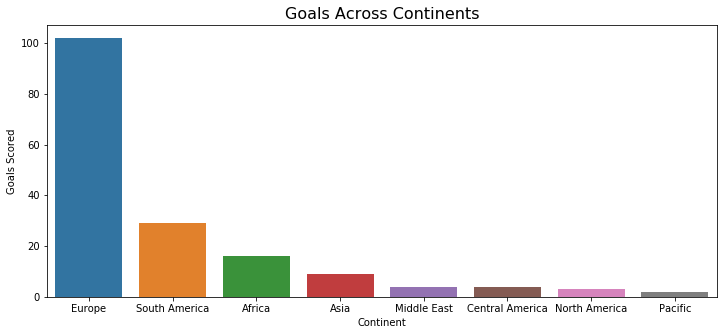

In [1124]:
# goals by continent

%matplotlib inline
plt.figure(figsize = (12,5))
sb.countplot(goals_df['continent'], order = goals_df['continent'].value_counts().index)
plt.title('Goals Across Continents', fontsize = 16)
plt.xlabel('Continent')
plt.ylabel('Goals Scored')

Text(0,0.5,'Total Goals')

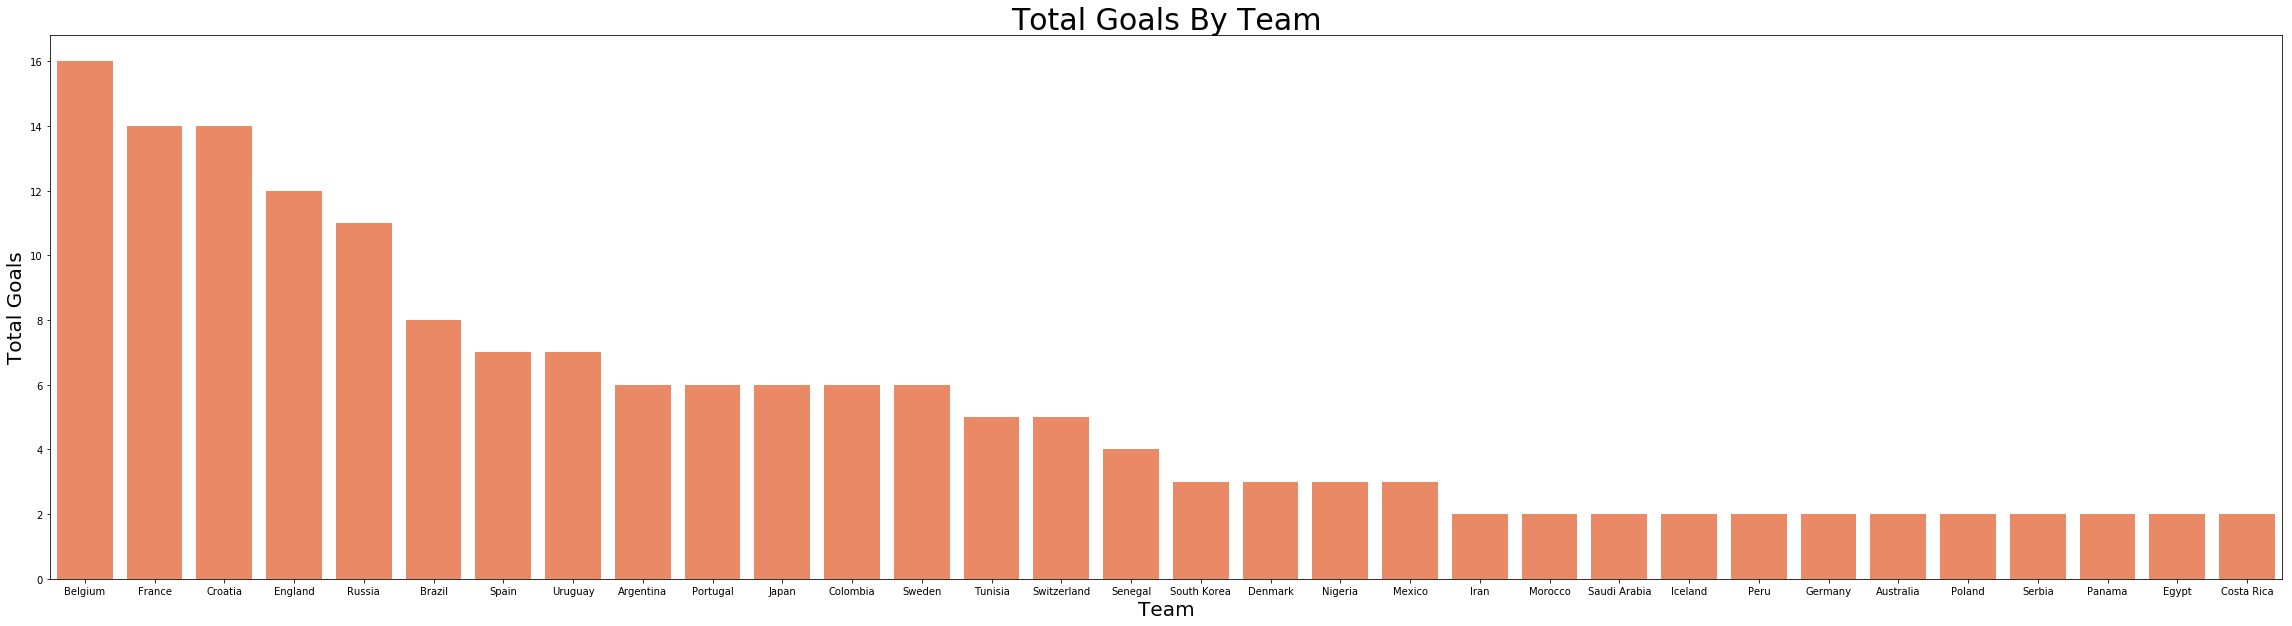

In [1125]:
# goals by country
plt.figure(figsize=(40,10))
sb.countplot(goals_df['scorer_team'], order = goals_df['scorer_team'].value_counts().index, color = 'Coral')
plt.title('Total Goals By Team', fontsize = 30)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Total Goals', fontsize = 20)

Text(0,0.5,'Average Goals per Game')

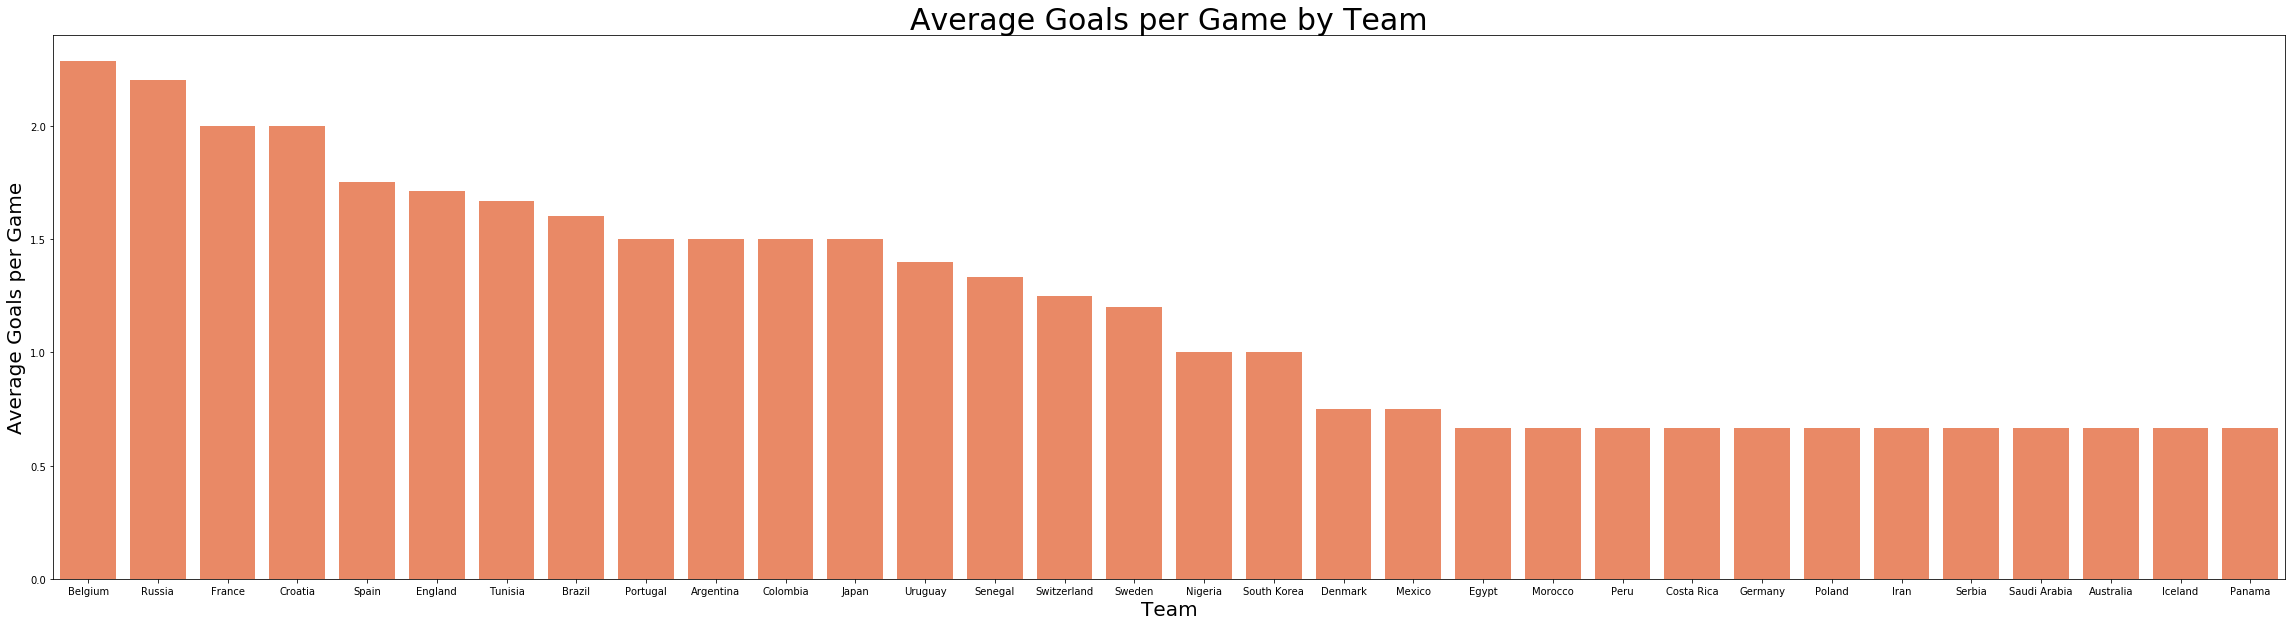

In [1171]:
# average goals by country
games_df['country1'] = games_df['team1'].apply(lambda x : x['name'])
games_df['country2'] = games_df['team2'].apply(lambda x : x['name'])

x = games_df['country1'].value_counts()
y = games_df['country2'].value_counts()

appearances = dict.fromkeys(games_df['country1'].unique())
for country in x.keys():
    appearances[country] = x[country] + y[country]

z = goals_df['scorer_team'].value_counts()
average = dict.fromkeys(games_df['country1'].unique())
for country in x.keys():
    average[country] = z[country]/appearances[country]

sorted_average = sorted(average.items(), key=lambda kv: kv[1], reverse = True)

countries, avg = zip(*sorted_average)
plt.figure(figsize=(40,10))
sb.barplot(x=list(countries),y=list(avg), color = 'Coral')
plt.title('Average Goals per Game by Team', fontsize = 30)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Average Goals per Game', fontsize = 20)

In [1170]:
countries, avg = zip(*sorted_average)
print(countries)
print(avg)

('Belgium', 'Russia', 'France', 'Croatia', 'Spain', 'England', 'Tunisia', 'Brazil', 'Portugal', 'Argentina', 'Colombia', 'Japan', 'Uruguay', 'Senegal', 'Switzerland', 'Sweden', 'Nigeria', 'South Korea', 'Denmark', 'Mexico', 'Egypt', 'Morocco', 'Peru', 'Costa Rica', 'Germany', 'Poland', 'Iran', 'Serbia', 'Saudi Arabia', 'Australia', 'Iceland', 'Panama')
(2.2857142857142856, 2.2000000000000002, 2.0, 2.0, 1.75, 1.7142857142857142, 1.6666666666666667, 1.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3999999999999999, 1.3333333333333333, 1.25, 1.2, 1.0, 1.0, 0.75, 0.75, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663)


In [1187]:
a = (1,2)
b = ('1st iterator element','2nd iterator element')
c = list(zip(a,b))
print(c)

[(1, '1st iterator element'), (2, '2nd iterator element')]


In [1188]:
d, e = zip(*c)
print(d)
print(e)

(1, 2)
('1st iterator element', '2nd iterator element')


Text(0.5,1,'Goals Scored Each Match Day')

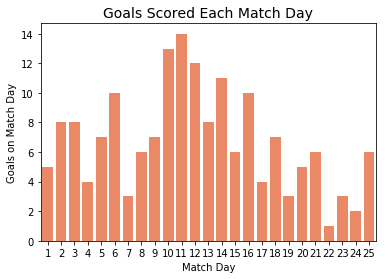

In [1127]:
days = list(range(30))
days.pop(0)


%matplotlib inline

ax = sb.countplot(data=goals_df, x='date', color = 'Coral')
ax.set_xticklabels(days)
plt.ylabel('Goals on Match Day')
plt.xlabel('Match Day')
plt.title('Goals Scored Each Match Day', fontsize = 14)

[5, 8, 8, 4, 7, 10, 3, 6, 7, 13, 14, 12, 8, 11, 6, 10, 4, 7, 3, 5, 6, 1, 3, 2, 6]


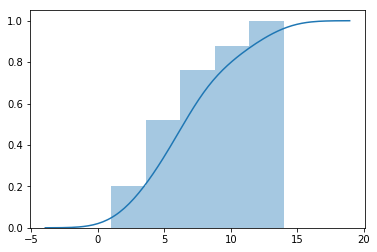

In [1128]:
date_goals = goals_df['date'].value_counts()
# sb.distplot(goals_df['date'].value_counts(),
#              hist_kws=dict(cumulative=True),
#              kde_kws=dict(cumulative=True))

# print(sorted(date_goals.index))
# for x in zip(*sorted(date_goals.items())):
#     print (x)

date, goals = zip(*sorted(date_goals.items()))

sb.distplot(list(goals), hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

print(list(goals))

Text(0,0.5,'Total Goals in Tournament')

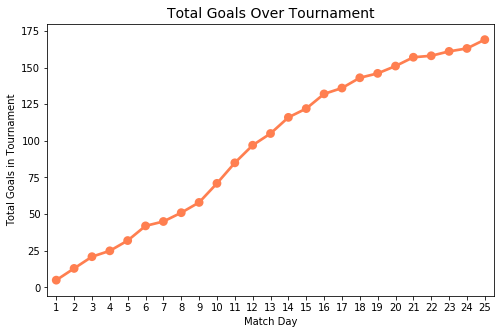

In [1129]:
goals_by_date = dict(zip(date, goals))
goals_by_date_df = pd.Series(goals_by_date)
cumsum_date = goals_by_date_df.cumsum()

ax = plt.figure(figsize=(8,5))

sb.pointplot(x = cumsum_date.index, y = cumsum_date, color = 'Coral')
plt.xticks(np.arange(25),days)
plt.title('Total Goals Over Tournament', fontsize = 14)
plt.xlabel('Match Day')
plt.ylabel('Total Goals in Tournament')


Text(0,0.5,'Total Goals')

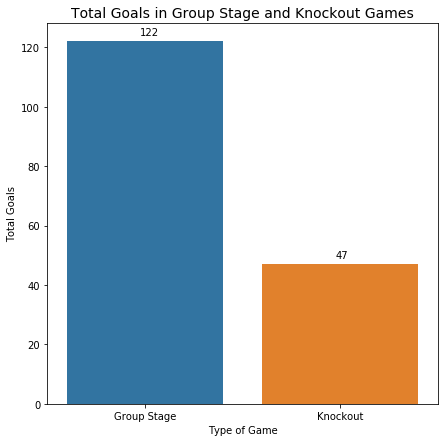

In [1130]:
plt.figure(figsize = (7,7))
ax = sb.countplot(goals_df['knockout'], order = goals_df['knockout'].value_counts().index)

for p, label in zip(ax.patches, goals_df['knockout'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+2))

ax.set_xticklabels(['Group Stage','Knockout'])
ax.set_title('Total Goals in Group Stage and Knockout Games', fontsize = 14)
ax.set_xlabel('Type of Game')
ax.set_ylabel('Total Goals')

Text(0,0.5,'Average Goals')

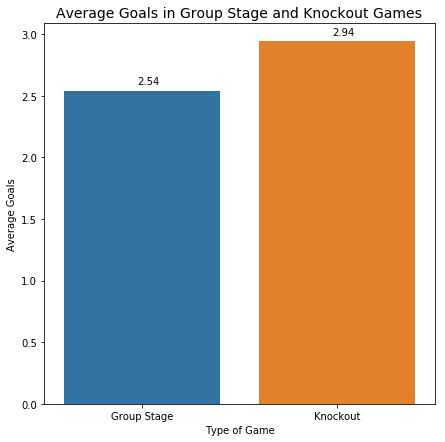

In [1131]:
group_avg = 2.54
knock_avg = 2.94



plt.figure(figsize = (7,7))
ax = sb.barplot(x = ['Group Average','Knockout Average'], y = [2.54,2.94])

for p, label in zip(ax.patches, [2.54,2.94]):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.05))

ax.set_xticklabels(['Group Stage','Knockout'])
ax.set_title('Average Goals in Group Stage and Knockout Games', fontsize = 14)
ax.set_xlabel('Type of Game')
ax.set_ylabel('Average Goals')

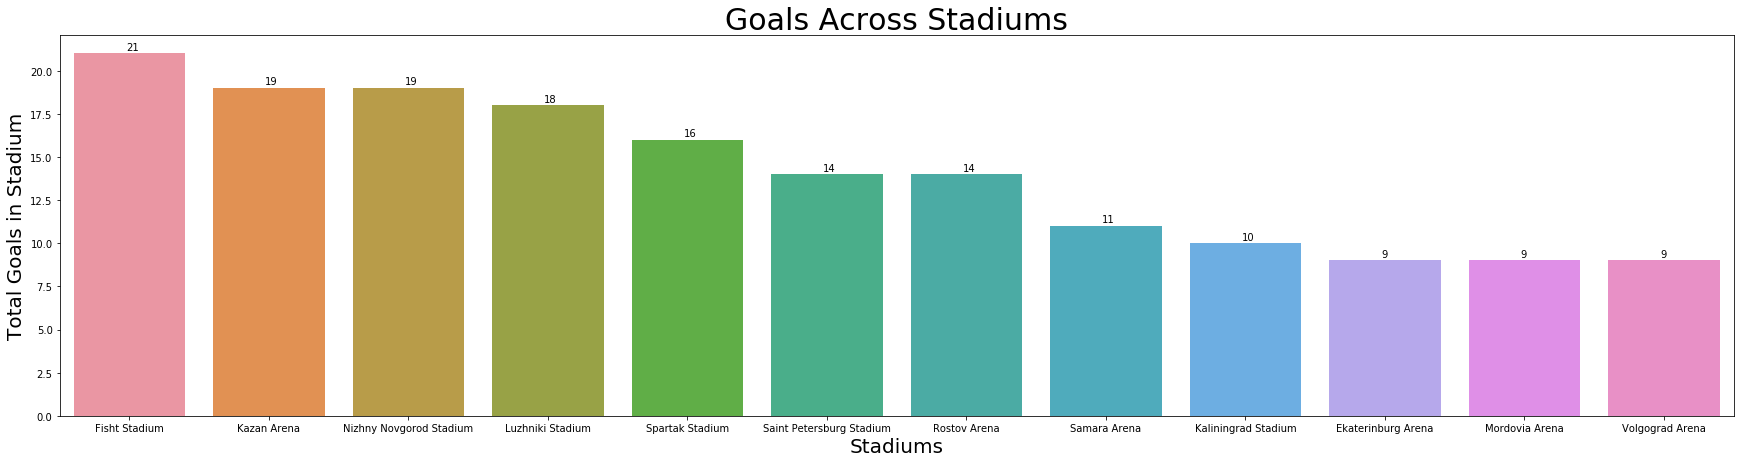

In [1132]:
plt.figure(figsize=(30,7))
ax = sb.countplot(goals_df['stadium'], order = goals_df['stadium'].value_counts().index)
plt.title('Goals Across Stadiums', fontsize = 30)
plt.xlabel('Stadiums', fontsize = 20)
plt.ylabel('Total Goals in Stadium', fontsize = 20)
for p, label in zip(ax.patches, goals_df['stadium'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.2))

In [1133]:
def get_per(num, total):
    return (str(num) + ' goals, ' + str(int(num/total*100))+'% of total')

['12 goals, 7% of total', '22 goals, 13% of total', '135 goals, 79% of total', '169 goals, 100% of total']


Text(0,0.5,'Total Goals of Type')

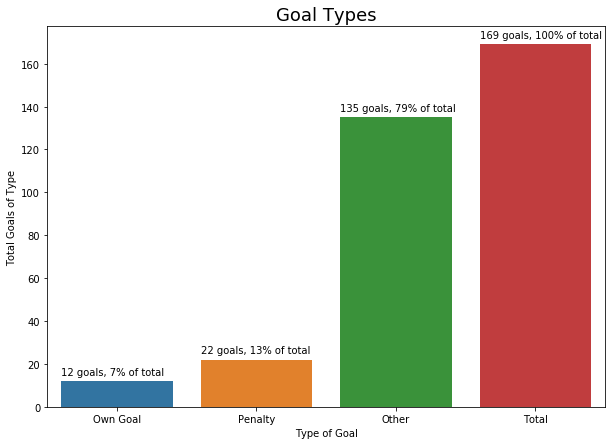

In [1189]:
own_goals = goals_df['owngoal'].sum()
penalties = goals_df['penalty'].sum()
total_goals = len(goals_df)
other_goals = total_goals - penalties - own_goals
percent_distribution = [get_per(own_goals, total_goals),get_per(penalties, total_goals),get_per(other_goals, total_goals),get_per(total_goals, total_goals)]
print(percent_distribution)

ax = plt.figure(figsize = (10,7))
ax = sb.barplot(y = [own_goals,penalties,other_goals,total_goals], x=['Own Goal','Penalty','Other','Total'])

for p, label in zip(ax.patches, percent_distribution):
    ax.annotate(label, (p.get_x(), p.get_height()+3))

plt.title('Goal Types', fontsize = 18)
plt.xlabel('Type of Goal')
plt.ylabel('Total Goals of Type')

In [1135]:
goals_df['stadium'].value_counts()

Fisht Stadium               21
Kazan Arena                 19
Nizhny Novgorod Stadium     19
Luzhniki Stadium            18
Spartak Stadium             16
Saint Petersburg Stadium    14
Rostov Arena                14
Samara Arena                11
Kaliningrad Stadium         10
Ekaterinburg Arena           9
Mordovia Arena               9
Volgograd Arena              9
Name: stadium, dtype: int64

Text(0,0.5,'Goals Scored at Game Status')

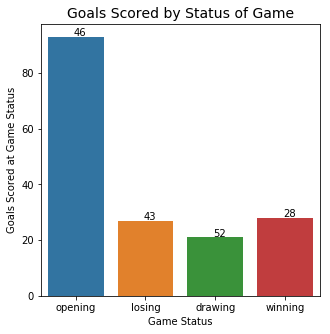

In [1136]:
plt.figure(figsize = (5,5))
ax = sb.countplot(goals_df['game_status'], order = ['opening','losing','drawing','winning'])
custom = [46,43,52,28]
for p, label in zip(ax.patches, custom):
    ax.annotate(label, (p.get_x() + 0.375,p.get_height()+0.3))
plt.title('Goals Scored by Status of Game', fontsize = 14)
plt.xlabel('Game Status')
plt.ylabel('Goals Scored at Game Status')

In [1137]:
goals_df['game_status'].value_counts()

opening    93
winning    28
losing     27
drawing    21
Name: game_status, dtype: int64

In [1032]:
import requests
url = 'https://www.fifa.com/common/fifa-world-ranking/_ranking_matchpoints_totals.js'
response = requests.get(url)
string = response.text
json_obj = json.loads(string)
rankings_df = pd.DataFrame(json_obj)
rankings_df = rankings_df[['countrycode','points']]

In [1034]:
with_rankings_df = pd.merge(goals_df, rankings_df, on='countrycode', how='left')
with_rankings_df.head()

,1H_added,2H_added,date,game_status,knockout,minute,opp_team,owngoal,penalty,period_scored,scorer,scorer_team,stadium,countrycode,continent,points
0,0,0,2018-06-14,drawing,0,12,Saudi Arabia,0,0,1H,gazinsky,Russia,Luzhniki Stadium,RUS,Europe,457.0
1,0,0,2018-06-14,winning,0,43,Saudi Arabia,0,0,1H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe,457.0
2,0,0,2018-06-14,winning,0,71,Saudi Arabia,0,0,2H,dzyuba,Russia,Luzhniki Stadium,RUS,Europe,457.0
3,0,1,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,cheryshev,Russia,Luzhniki Stadium,RUS,Europe,457.0
4,0,4,2018-06-14,winning,0,90,Saudi Arabia,0,0,2H,golovin,Russia,Luzhniki Stadium,RUS,Europe,457.0


In [1059]:
average_df = pd.DataFrame.from_dict(average, orient = 'index')
average_df.columns = ['average_goals']
average_df['scorer_team'] = average_df.index
average_df = pd.merge(average_df, teams_df, on='scorer_team', how='left')
average_df = pd.merge(average_df, rankings_df, on='countrycode', how='left')

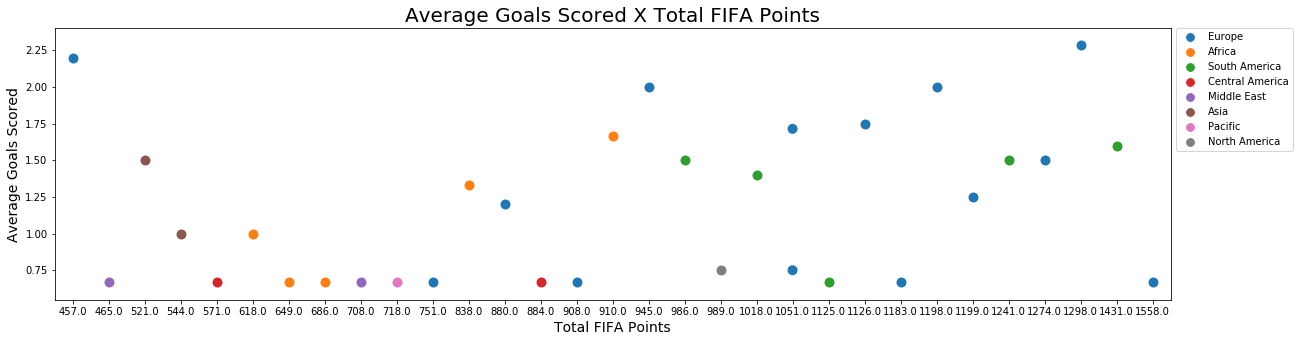

In [1102]:
plt.figure(figsize = (20,5))
sb.swarmplot(data = average_df, x='points', y='average_goals', hue = 'continent', marker = 'o', s=10)
plt.title('Average Goals Scored X Total FIFA Points', fontsize = 20)
plt.xlabel('Total FIFA Points', fontsize = 14)
plt.ylabel('Average Goals Scored', fontsize = 14)
plt.legend(bbox_to_anchor=(1.005, 1), loc=0, borderaxespad=0.)

In [1141]:
average_df[average_df['scorer_team'] == 'Tunisia']

,average_goals,scorer_team,countrycode,continent,points
13,1.666667,Tunisia,TUN,Africa,910.0


In [1085]:
average_df[average_df['points'] < 600]

,average_goals,scorer_team,countrycode,continent,points
0,2.200000,Russia,RUS,Europe,457.0
21,1.000000,South Korea,KOR,Asia,544.0
23,1.500000,Japan,JPN,Asia,521.0
24,0.666667,Saudi Arabia,KSA,Middle East,465.0
30,0.666667,Panama,PAN,Central America,571.0


In [1088]:
average_df[average_df['points'] > 1000]

,average_goals,scorer_team,countrycode,continent,points
2,1.500000,Portugal,POR,Europe,1274.0
4,2.000000,France,FRA,Europe,1198.0
5,0.666667,Peru,PER,South America,1125.0
6,1.500000,Argentina,ARG,South America,1241.0
8,1.600000,Brazil,BRA,South America,1431.0
10,0.666667,Germany,GER,Europe,1558.0
12,2.285714,Belgium,BEL,Europe,1298.0
14,0.666667,Poland,POL,Europe,1183.0
16,1.400000,Uruguay,URU,South America,1018.0
18,0.750000,Denmark,DEN,Europe,1051.0


In [1155]:
average_df[(average_df['average_goals'] > 1.1) & (average_df['points'] < 927.5)]

,average_goals,scorer_team,countrycode,continent,points
0,2.200000,Russia,RUS,Europe,457.0
11,1.200000,Sweden,SWE,Europe,880.0
13,1.666667,Tunisia,TUN,Africa,910.0
23,1.500000,Japan,JPN,Asia,521.0
31,1.333333,Senegal,SEN,Africa,838.0


In [1156]:
average_df[(average_df['average_goals'] < 1.1) & (average_df['points'] > 927.5)]

,average_goals,scorer_team,countrycode,continent,points
5,0.666667,Peru,PER,South America,1125.0
10,0.666667,Germany,GER,Europe,1558.0
14,0.666667,Poland,POL,Europe,1183.0
18,0.750000,Denmark,DEN,Europe,1051.0
29,0.750000,Mexico,MEX,North America,989.0


In [1150]:
average_df['points'].describe()

count      32.000000
mean      930.656250
std       288.798469
min       457.000000
25%       702.500000
50%       927.500000
75%      1140.250000
max      1558.000000
Name: points, dtype: float64

In [1151]:
average_df['average_goals'].describe()

count    32.000000
mean      1.184375
std       0.530196
min       0.666667
25%       0.666667
50%       1.100000
75%       1.525000
max       2.285714
Name: average_goals, dtype: float64

In [727]:
from tabula import read_pdf
players_df = read_pdf('2018_players.pdf', pages = 'all')

KeyboardInterrupt: 

In [ ]:
new_cols = ['position','shirtname', 'popname','club_country','birth_date','age','height','weight']
# new_cols_df = pd.DataFrame(columns = new_cols).fillna('')
# new_cols_df.head()

players_df = pd.concat([players_df,pd.DataFrame(columns = new_cols)])
players_df.fillna('', inplace = True)
players_df = players_df.drop(players_df[players_df['#'] == '#'].index)
players_df[players_df['Team'] == 'Belgium']

In [ ]:
def return_rest(arr):
    arr.pop(0)
    return ' '.join(arr).lower()

In [ ]:
return_rest(['dd','adD','da'])

In [ ]:
from datetime import datetime, date

players_df['position'] = players_df['Pos. FIFA Popular Name'].apply(lambda x: x.split(' ')[0])
players_df['height'] = players_df['Height Weight'].apply(lambda x: x.split(' ')[0])
players_df['weight'] = players_df['Height Weight'].apply(lambda x: x.split(' ')[1])
players_df['club_country'] = players_df['Club'].apply(lambda x: x.split(' ')[-1].strip('()'))
players_df['shirtname'] = players_df['Birth Date Shirt Name'].apply(lambda x: return_rest(x.split(' ')))
players_df['popname'] = players_df['Pos. FIFA Popular Name'].apply(lambda x: return_rest(x.split(' ')))
players_df['birth_date'] = players_df['Birth Date Shirt Name'].apply(lambda x: datetime.strptime(x.split(' ')[0],'%d.%m.%Y'))
players_df['age'] = players_df['birth_date'].apply(lambda x: int(((datetime.now() - x).days)/365))
players_df = players_df[['Club','Team','age','club_country','shirtname', 'popname','height','position','weight']]
players_df[players_df['Team'] == 'Belgium']

In [ ]:
players_df[players_df['Team'] == 'France']

In [ ]:
def strip_accents(s):
    """
    Sanitarize the given unicode string and remove all special/localized
    characters from it.
 
    Category "Mn" stands for Nonspacing_Mark
    """
    try:
        return ''.join(
            c for c in unicodedata.normalize('NFD', s)
            if unicodedata.category(c) != 'Mn'
        )
    except:
        return s

In [ ]:
# accents
# one or two phrases
# opposite order

In [ ]:
count = 0
for index, goal in goals_df.iterrows():
    if strip_accents(goal['scorer']) not in strip_accents(players_df['shirtname'].unique()) and strip_accents(goal['scorer'] not in players_df['popname'].unique()):
        count += 1
        print(goal['scorer'])
print(count)

In [ ]:
players_df['shirtname'].unique()

In [ ]:
goals_df['scorer'].unique()